In [449]:
# Import of relevant packages
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import airportsdata
import datetime 
import warnings
warnings.filterwarnings('ignore')



In [450]:
# installing airport data package
#!pip install -U airportsdata

In [451]:
# introducing each dataset 
d_test='data/Test.csv'
d_sample='data/SampleSubmission.csv'
d_train='data/Train.csv'

In [452]:
df_test=pd.read_csv(d_test)
df_test.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
5,test_id_5,2016-05-11,UG 1313,CDG,SFA,2016-05-11 11:10:00,2016-05-11 12.40.00,DEP,TU CR9ISA
6,test_id_6,2016-05-11,TU 0515,BCN,TUN,2016-05-11 10:40:00,2016-05-11 12.15.00,ATA,TU 32AIMF
7,test_id_7,2016-05-11,TU 0712,CMN,TUN,2016-05-11 10:35:00,2016-05-11 13.00.00,ATA,TU 32AIMN
8,test_id_8,2016-05-11,TU 0751,LYS,TUN,2016-05-11 10:40:00,2016-05-11 12.35.00,ATA,TU 320IMS
9,test_id_9,2016-05-11,TU 0745,FRA,TUN,2016-05-11 10:30:00,2016-05-11 12.55.00,ATA,TU 32AIMC


In [453]:
df_sample=pd.read_csv(d_sample)
df_sample.head(2)

,ID,target
0,test_id_0,2470
1,test_id_1,2944


In [454]:
df_train=pd.read_csv(d_train)
df_train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


Variable definitions

* DATOP - Date of flight
* FLTID - Flight number
* DEPSTN - Departure point
* ARRSTN - Arrival point
* STD - Scheduled Time departure
* STA - Scheduled Time arrival
* STATUS - Flight status
* ETD - Expected Time departure
* ETA - Expected Time arrival
* ATD - Actual Time of Departure
* ATA - Actual Time of arrival
* DELAY1 - Delay code 1
* DUR1 - delay time 1
* DELAY2 - Delay code 2
* DUR2 - delay time 2
* DELAY3 - Delay code 3
* DUR3 - delay time 3
* DELAY4 - Delay code 4
* DUR4 - delay time 4
* AC - Aircraft Code

# Data cleaningin and feature engineering

In [455]:
df_train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [456]:
df=df_train.copy()

In [457]:
df.shape

(107833, 10)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [459]:
df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


### Renaming Columns

In [460]:
# convert column names to lower case and omit the space before or between or after column names
df.columns= df.columns.str.lower().str.strip()
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status',
       'ac', 'target'],
      dtype='object')

### Finding more about the data types of columns

In [461]:
# finding the data types of each column

df.dtypes

id         object
datop      object
fltid      object
depstn     object
arrstn     object
std        object
sta        object
status     object
ac         object
target    float64
dtype: object

In [462]:
df.nunique()

id        107833
datop       1011
fltid       1861
depstn       132
arrstn       128
std        81697
sta        85136
status         5
ac            68
target       968
dtype: int64

In [463]:
# find the categories of the categorical feature 'status'
df.status.unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

* ATA	Actual Time Of Arrival	
* DEP	Depart or Departure 
* RTR   Return to Ramp
* SCH   Scheduled change 
* DEL   


In [464]:
df.status.value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: status, dtype: int64

In [465]:
# change "datop" dtype to datetime with format %Y/%m/%d
df['datop'] = pd.to_datetime(df['datop'], format='%Y/%m/%d')

In [466]:
# change "std" dtype to datetime with format %Y/%m/%d
df['std'] = pd.to_datetime(df['std'], format='%Y/%m/%d %H:%M:%S')

In [467]:
# change "sta" format for example from  12.55.00 to 12:55:00
df['sta']=df['sta'].apply(lambda x: x.replace(".",":"))

In [468]:
# change "sta" dtype to datetime with format %Y/%m/%d
df['sta'] = pd.to_datetime(df['sta'], format='%Y/%m/%d %H:%M:%S')

### changing  dtype of the some columns to srting

In [469]:
df=df.astype({'fltid' :'string'} )

In [470]:
df=df.astype({'depstn' :'string'}) 

In [471]:
df=df.astype({'arrstn' : 'string'})

In [472]:
df=df.astype({'ac' :'string'})

In [473]:
# Replacing Categorical to Numerical 
# Label encoder function On Embarked

encoder = LabelEncoder()
df.status =encoder.fit_transform(df.status)
df.head(5)

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,0,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,0,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,0,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,0,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,0,TU 320IMU,22.0


In [474]:
df.status.value_counts()

0    93679
4    13242
2      467
3      294
1      151
Name: status, dtype: int64

In [475]:
df.dtypes

id                object
datop     datetime64[ns]
fltid             string
depstn            string
arrstn            string
std       datetime64[ns]
sta       datetime64[ns]
status             int64
ac                string
target           float64
dtype: object

In [476]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,0,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,0,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,0,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,0,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,0,TU 320IMU,22.0


In [477]:
# knowing how many status are 'ATA' and also having more than 0 minute delay in target . 
df[(df.status =='ATA') & (df.target != 0.0)]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target


### checking for duplicates

In [478]:
df_copy = df.copy()

In [479]:
df[(df.datop == '2016-10-13') & (df.depstn == 'LYS')]
df_copy.drop(columns= ['id', 'status','target'], inplace=True )


In [480]:
df_copy.duplicated().sum()

5

In [481]:
df_copy[df_copy.duplicated()]

,datop,fltid,depstn,arrstn,std,sta,ac
23335,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR
24606,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,TU 31BIMO
26716,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,TU 736IOR
41876,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,TU 320IMS
57786,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,TU 320IMV


### now we check all these 5 duplicated and drop the duplicated ones with less delays 

In [482]:
# 1
df[(df.datop == '2016-10-13') & (df.depstn == 'LYS')]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
21099,train_id_21099,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,3,TU 736IOR,35.0
21101,train_id_21101,2016-10-13,TU 0851,LYS,TUN,2016-10-13 16:00:00,2016-10-13 17:55:00,0,TU 32AIMP,20.0
23335,train_id_23335,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,3,TU 736IOR,1831.0
26716,train_id_26716,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,3,TU 736IOR,235.0


In [483]:
# dropping the 2 least minute target delay rows from the duplications

df=df.drop(index=[21099 , 26716])


In [484]:
# 2
df[(df.datop == '2016-10-13') & (df.depstn == 'LYS')]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
21101,train_id_21101,2016-10-13,TU 0851,LYS,TUN,2016-10-13 16:00:00,2016-10-13 17:55:00,0,TU 32AIMP,20.0
23335,train_id_23335,2016-10-13,TU 0431,LYS,LYS,2016-10-13 15:55:00,2016-10-13 18:00:00,3,TU 736IOR,1831.0


In [485]:
# 3
df[(df.datop == '2016-10-13') & (df.depstn == 'TUN') & (df.arrstn == 'TUN')]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
23614,train_id_23614,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,3,TU 31BIMO,0.0
24606,train_id_24606,2016-10-13,TU 0752,TUN,TUN,2016-10-13 08:00:00,2016-10-13 09:20:00,3,TU 31BIMO,42.0
29522,train_id_29522,2016-10-13,WKL 0000,TUN,TUN,2016-10-13 22:00:00,2016-10-14 01:00:00,4,TU 320IMS,0.0
29745,train_id_29745,2016-10-13,WKL 0000,TUN,TUN,2016-10-13 22:00:00,2016-10-14 01:00:00,4,TU 320IMV,0.0
31700,train_id_31700,2016-10-13,WKL 0000,TUN,TUN,2016-10-13 22:00:00,2016-10-14 01:00:00,4,TU 32AIMN,0.0
31754,train_id_31754,2016-10-13,WKL 0000,TUN,TUN,2016-10-13 22:00:00,2016-10-14 01:00:00,4,TU 31BIMQ,0.0


In [486]:
df=df.drop(index=[23614])

In [487]:
# 4
df[(df.datop == '2017-09-01') & (df.depstn == 'TUN') & (df.arrstn == 'TUN')]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
54682,train_id_54682,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,0,TU 320IMV,148.0
57786,train_id_57786,2017-09-01,TU 0752,TUN,TUN,2017-09-01 08:20:00,2017-09-01 09:45:00,3,TU 320IMV,30.0
62701,train_id_62701,2017-09-01,TU 0282,TUN,TUN,2017-09-01 07:20:00,2017-09-01 09:15:00,3,TU 736ION,21.0
67335,train_id_67335,2017-09-01,WKL 0000,TUN,TUN,2017-09-01 22:00:00,2017-09-02 01:00:00,4,TU 32AIMN,0.0
67557,train_id_67557,2017-09-01,INT 0000,TUN,TUN,2017-09-01 22:40:00,2017-09-02 02:40:00,4,TU 320IMT,0.0
68162,train_id_68162,2017-09-01,WKL 0000,TUN,TUN,2017-09-01 23:00:00,2017-09-02 02:00:00,4,TU 332IFM,0.0


In [488]:
df=df.drop(index=[57786])

In [489]:
# 5
df[(df.datop == '2017-05-27') & (df.depstn == 'MIR') & (df.arrstn == 'MIR')]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
39467,train_id_39467,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,3,TU 320IMS,113.0
41876,train_id_41876,2017-05-27,TU 0440,MIR,MIR,2017-05-27 11:50:00,2017-05-27 14:15:00,3,TU 320IMS,48.0
68664,train_id_68664,2017-05-27,AOG 0000,MIR,MIR,2017-05-27 15:00:00,2017-05-27 17:20:00,4,TU 320IMS,0.0


In [490]:
df=df.drop(index=[41876])

In [491]:
df[df.duplicated()]

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target


In [492]:
df.duplicated().sum()

0

###

In [493]:
df.groupby(['depstn']).describe()

status                                              target              \
        count      mean       std  min  25%  50%  75%  max  count        mean   
depstn                                                                          
AAE       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0    1.0  157.000000   
AAL       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0    1.0    0.000000   
ABJ     823.0  0.046173  0.418905  0.0  0.0  0.0  0.0  4.0  823.0   77.801944   
ADB       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0    1.0    0.000000   
AHU      50.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   50.0   35.660000   
...       ...       ...       ...  ...  ...  ...  ...  ...    ...         ...   
VNO       5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0    5.0    1.000000   
VOG       2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0    2.0  328.000000   
VRN      27.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   27.0   46.925926   
YUL     243.0  0.016461  0.256600  0.0  0.0  0.0  0.0  4.0  243.0   45.691358   
ZRH     372.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  372.0   38.153226   

                                                        
               std    min    25%    50%    75%     max  
depstn                                                  
AAE            NaN  157.0  157.0  157.0  157.0   157.0  
AAL            NaN    0.0    0.0    0.0    0.0     0.0  
ABJ     229.947870    0.0    5.5   26.0   55.0  3317.0  
ADB            NaN    0.0    0.0    0.0    0.0     0.0  
AHU      76.233961    0.0    0.0    9.0   23.0   338.0  
...            ...    ...    ...    ...    ...     ...  
VNO       2.236068    0.0    0.0    0.0    0.0     5.0  
VOG       8.485281  322.0  325.0  328.0  331.0   334.0  
VRN     120.039072    0.0    0.0    0.0   20.0   570.0  
YUL      69.758907    0.0    6.0   20.0   49.5   428.0  
ZRH     137.320216    0.0    0.0   10.0   28.0  1940.0  

[132 rows x 16 columns]

In [494]:
df.sort_values(by='target' , ascending=False)

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
48878,train_id_48878,2017-09-30,TU 0875,GVA,DJE,2017-09-30 09:25:00,2017-09-30 11:45:00,0,TU 32AIMM,3451.0
99731,train_id_99731,2018-12-27,TU 0399,ABJ,TUN,2018-12-27 22:40:00,2018-12-28 03:50:00,0,TU 320IMU,3317.0
77495,train_id_77495,2018-05-13,TU 2588,DJE,LYS,2018-05-13 12:00:00,2018-05-13 14:20:00,0,TU 32AIML,3245.0
59199,train_id_59199,2017-08-31,TU 2771,CDG,TUN,2017-08-31 10:15:00,2017-08-31 12:45:00,0,TU 32AIMM,3025.0
10123,train_id_10123,2016-03-20,TU 0209,NTE,TUN,2016-03-20 10:30:00,2016-03-20 12:50:00,0,TU 736IOQ,2980.0
...,...,...,...,...,...,...,...,...,...,...
54125,train_id_54125,2017-07-25,TU 0602,DJE,TUN,2017-07-25 04:30:00,2017-07-25 05:20:00,0,TU 736IOQ,0.0
54126,train_id_54126,2017-07-25,TU 0668,DJE,MIR,2017-07-25 05:50:00,2017-07-25 06:30:00,0,D4 319CQG,0.0
54127,train_id_54127,2017-07-25,TU 0634,DJE,ORY,2017-07-25 06:05:00,2017-07-25 08:50:00,0,TU 736IOR,0.0
54128,train_id_54128,2017-07-25,TU 0602,TUN,ZRH,2017-07-25 06:10:00,2017-07-25 08:15:00,0,TU 736IOQ,0.0


In [495]:
df.groupby(['arrstn']).describe()

status                                               target  \
         count      mean       std  min  25%  50%  75%  max   count   
arrstn                                                                
AAE        1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0     1.0   
ABJ      823.0  0.046173  0.418905  0.0  0.0  0.0  0.0  4.0   823.0   
ADB        1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0     1.0   
AHU       50.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0    50.0   
ALG     1573.0  0.006993  0.161346  0.0  0.0  0.0  0.0  4.0  1573.0   
...        ...       ...       ...  ...  ...  ...  ...  ...     ...   
VNO        6.0  0.333333  0.816497  0.0  0.0  0.0  0.0  2.0     6.0   
VOG        2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0     2.0   
VRN       27.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0    27.0   
YUL      243.0  0.016461  0.256600  0.0  0.0  0.0  0.0  4.0   243.0   
ZRH      372.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   372.0   

                                                                    
              mean         std    min    25%    50%    75%     max  
arrstn                                                              
AAE      28.000000         NaN   28.0   28.0   28.0   28.0    28.0  
ABJ      50.191981   93.880753    0.0   10.0   29.0   53.0  1982.0  
ADB      45.000000         NaN   45.0   45.0   45.0   45.0    45.0  
AHU      48.140000  116.541665    0.0    0.0   10.5   28.0   618.0  
ALG      70.114431  115.537805    0.0   10.0   27.0   69.0  1051.0  
...            ...         ...    ...    ...    ...    ...     ...  
VNO       0.000000    0.000000    0.0    0.0    0.0    0.0     0.0  
VOG     178.000000  103.237590  105.0  141.5  178.0  214.5   251.0  
VRN      48.148148  100.394493    0.0    0.0   13.0   25.0   426.0  
YUL      38.164609   54.909821    0.0   12.0   23.0   39.0   406.0  
ZRH      39.583333  136.775697    0.0    0.0   10.0   29.0  1934.0  

[128 rows x 16 columns]

In [496]:
# airport data information 
airports = airportsdata.load('IATA')  # key is the IATA location code
print(airports['TUN'])

{'icao': 'DTTA', 'iata': 'TUN', 'name': 'Tunis Carthage International Airport', 'city': 'Tunis', 'subd': 'Tunis', 'country': 'TN', 'elevation': 22.0, 'lat': 36.8510017395, 'lon': 10.2271995544, 'tz': 'Africa/Tunis', 'lid': ''}


In [497]:
airports['TUN']['lat']

36.8510017395

In [498]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,0,TU 32AIMN,260.0


In [499]:
df[df.arrstn=='SXF']

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
308,train_id_308,2016-04-30,TU 6592,NBE,SXF,2016-04-30 11:25:00,2016-04-30 14:20:00,0,TU 736IOK,117.0
342,train_id_342,2016-01-16,TU 6592,NBE,SXF,2016-01-16 15:35:00,2016-01-16 18:30:00,0,TU 32AIMD,0.0
438,train_id_438,2016-08-05,TU 6548,HAM,SXF,2016-08-05 10:15:00,2016-08-05 11:05:00,0,TU 32AIMD,55.0
939,train_id_939,2016-06-04,TU 6592,NBE,SXF,2016-06-04 11:25:00,2016-06-04 14:20:00,0,TU 736IOK,27.0
1192,train_id_1192,2016-04-23,TU 6592,NBE,SXF,2016-04-23 11:25:00,2016-04-23 14:20:00,0,TU 31AIMJ,50.0
...,...,...,...,...,...,...,...,...,...,...
101465,train_id_101465,2018-10-21,TU 6592,MIR,SXF,2018-10-21 12:50:00,2018-10-21 15:50:00,0,TU 736IOR,0.0
102344,train_id_102344,2018-12-02,TU 6594,MIR,SXF,2018-12-02 05:50:00,2018-12-02 08:50:00,0,TU 736IOQ,6.0
102617,train_id_102617,2018-11-18,TU 6594,MIR,SXF,2018-11-18 05:50:00,2018-11-18 08:50:00,0,TU 736IOK,8.0
102782,train_id_102782,2018-12-23,TU 6594,MIR,SXF,2018-12-23 05:50:00,2018-12-23 08:50:00,0,TU 736IOR,6.0


In [500]:
# because SXF is old name of berlin airport and now it is BER we have to change all SXF in data set to BER
df['arrstn']=df['arrstn'].apply(lambda x: x.replace ('SXF','BER'))

In [501]:
airports['BER']['lat']

52.362167

In [502]:
# because SXF is old name of berlin airport and now it is BER we have to change all SXF in data set to BER
df['depstn']=df['depstn'].apply(lambda x: x.replace ('SXF','BER'))

In [503]:
# we made a new column as 'lat_arr' for the latitude of arrival destination ('arrstn')
df['lat_arr']=df['arrstn'].apply(lambda x: airports[x]['lat'])
# we made a new column as 'lon_arr' for the longitude of arrival destination ('arrstn')
df['lon_arr']=df['arrstn'].apply(lambda x: airports[x]['lon'])


In [504]:
# we made a new column as 'lat_dep' for the latitude of departure destination ('dpstn')
df['lat_dep']=df['depstn'].apply(lambda x: airports[x]['lat'])
# we made a new column as 'lon_dep' for the longitude of departure destination ('dpstn')
df['lon_dep']=df['depstn'].apply(lambda x: airports[x]['lon'])

In [505]:
def make_season(x):
    if  x =="03" or x =="04" or  x =="05":
        return "Spring"
    elif x =="06" or x =="07" or  x =="08":
        return "Summer"
    elif x =="09" or x =="10" or  x =="11":
        return "Autumn"
    else :
        return "Winter"

In [506]:
df['year_std'] = pd.DatetimeIndex(df['std']).year
df['month_std'] = df['std'].dt.strftime('%m')
df['Season_std'] =  df.month_std.apply(lambda x: make_season(x))
df['weekday_std'] = pd.DatetimeIndex(df['std']).weekday
df['hour_std'] = pd.DatetimeIndex(df['std']).hour

In [507]:
df['year_sta'] = pd.DatetimeIndex(df['sta']).year
df['month_sta'] = df['sta'].dt.strftime('%m')
df['Season_sta'] =  df.month_std.apply(lambda x: make_season(x))
df['weekday_sta'] = pd.DatetimeIndex(df['sta']).weekday
df['hour_sta'] = pd.DatetimeIndex(df['sta']).hour

In [508]:
df.head(1)

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,year_std,month_std,Season_std,weekday_std,hour_std,year_sta,month_sta,Season_sta,weekday_sta,hour_sta
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,0,TU 32AIMN,260.0,...,2016,01,Winter,6,10,2016,01,Winter,6,12


In [509]:
df.target.describe()

count    107828.000000
mean         48.732045
std         117.136789
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64

In [510]:
df_2=df[df.target==0 ]
df_2.head(1)


,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,year_std,month_std,Season_std,weekday_std,hour_std,year_sta,month_sta,Season_sta,weekday_sta,hour_sta
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,0,TU 32AIMN,0.0,...,2016,01,Winter,5,4,2016,01,Winter,5,6


In [511]:
type(df_2.target[2])

numpy.float64

In [512]:
# Trying the One-hot-encoding On Sex
One_hot = pd.get_dummies(df.status)
One_hot

df = df.join(One_hot)
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,year_sta,month_sta,Season_sta,weekday_sta,hour_sta,0,1,2,3,4
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,0,TU 32AIMN,260.0,...,2016,01,Winter,6,12,1,0,0,0,0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,0,TU 31BIMO,20.0,...,2016,01,Winter,2,16,1,0,0,0,0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,0,TU 32AIMN,0.0,...,2016,01,Winter,5,6,1,0,0,0,0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,0,TU 736IOK,0.0,...,2016,01,Winter,6,17,1,0,0,0,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,0,TU 320IMU,22.0,...,2016,01,Winter,6,15,1,0,0,0,0


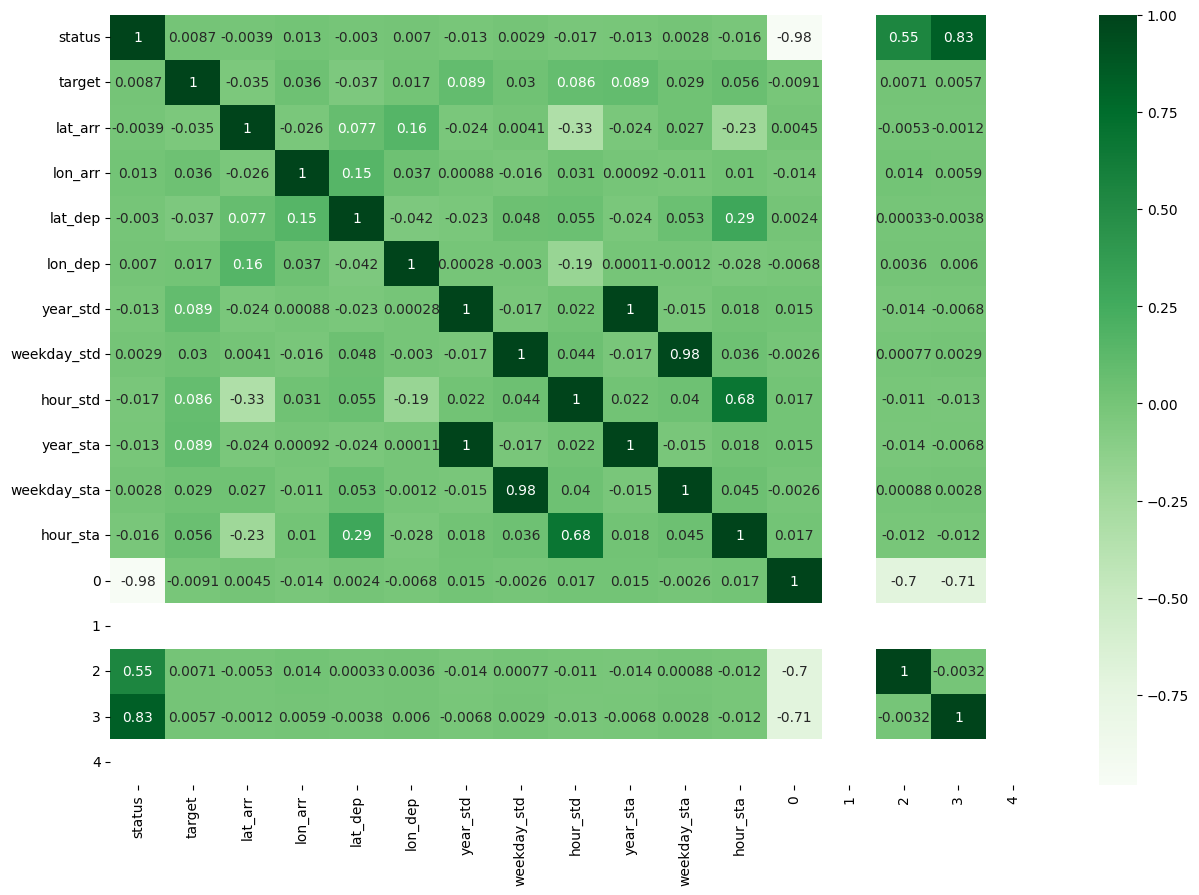

In [519]:
cor = df[(df.target !=0) &  (df[1])].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

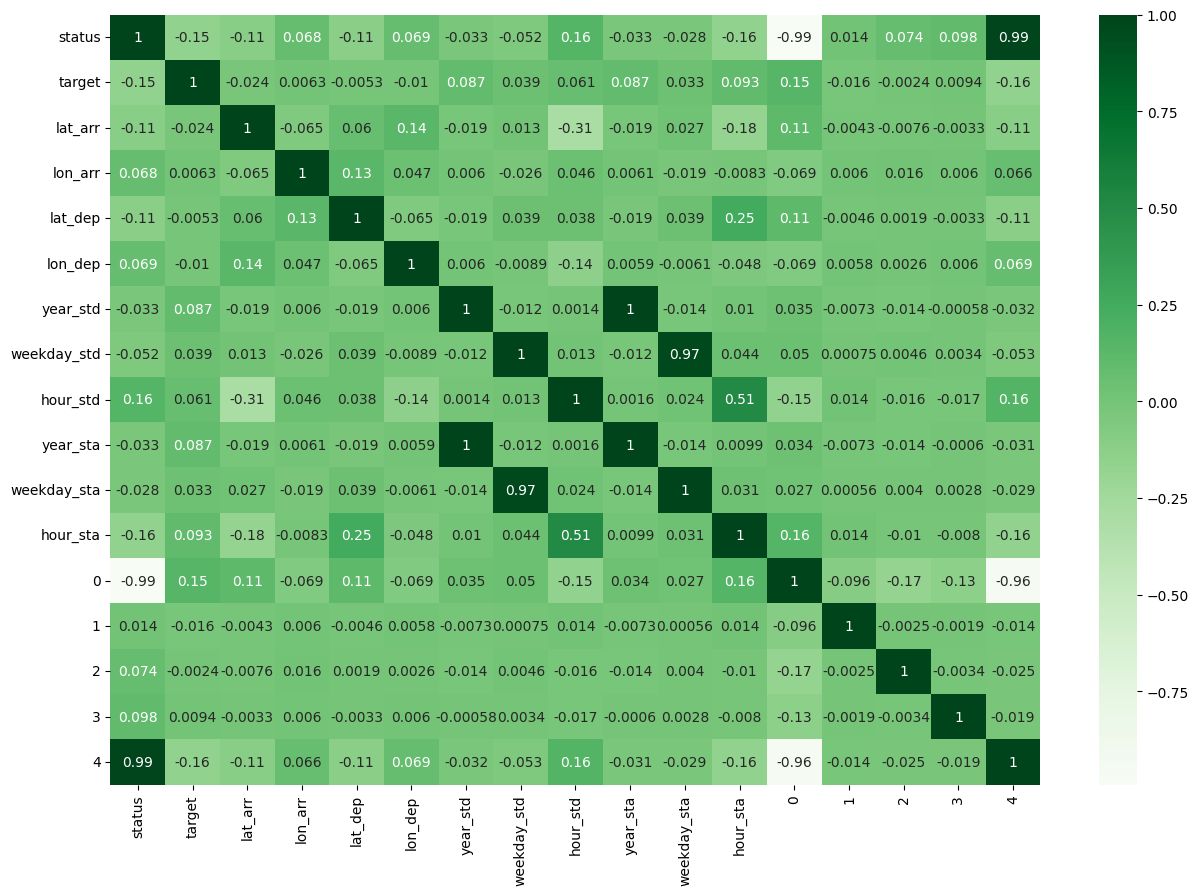

In [518]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

### visualisation

In [515]:
#sns.pairplot(data=df_clean , vars=['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status','ac', 'target'])

In [516]:
# sns.pairplot(data=df , hue='status')

## Splitting data for testing 

In [517]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
